# Assignment 9:  Analyzing Boston Marathon Times

## Proposal: Running is a passion of mine and so I thought it might be fun to analyze the results of the Boston Marathon for one year.  I ran Boston in 2013, the year of the bombings, so although I would have liked to use data for that year, it would be incomplete.  I hope to compare sample mean times with the population mean time for increasing sample sizes, for all data, and for male and female specific data. 


## Source:  Kaggle (https://www.kaggle.com/rojour/boston-results?select=marathon_results_2017.csv)

### Step 1:  Import libraries, read and analyze the file.

In [1]:
import pandas as pd                 # import libraries
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os

In [2]:
os.getcwd()                         # check directory

'C:\\Users\\bolzj'

In [3]:
df=pd.read_csv('marathon_results_2017.csv')       # Read the data file into python data frame

df.shape                                          # Find out the number of rows/observations and columns/variables

(26410, 25)

In [4]:
df.head()                                         # Display the first 5 rows

,Unnamed: 0,Bib,Name,Age,M/F,City,State,Country,Citizen,Unnamed: 9,...,25K,30K,35K,40K,Pace,Proj Time,Official Time,Overall,Gender,Division
0,0,11,"Kirui, Geoffrey",24,M,Keringet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:02:53,0:04:57,-,2:09:37,1,1,1
1,1,17,"Rupp, Galen",30,M,Portland,OR,USA,NaN,NaN,...,1:16:59,1:33:01,1:48:19,2:03:14,0:04:58,-,2:09:58,2,2,2
2,2,23,"Osako, Suguru",25,M,Machida-City,NaN,JPN,NaN,NaN,...,1:17:00,1:33:01,1:48:31,2:03:38,0:04:59,-,2:10:28,3,3,3
3,3,21,"Biwott, Shadrack",32,M,Mammoth Lakes,CA,USA,NaN,NaN,...,1:17:00,1:33:01,1:48:58,2:04:35,0:05:03,-,2:12:08,4,4,4
4,4,9,"Chebet, Wilson",31,M,Marakwet,NaN,KEN,NaN,NaN,...,1:16:59,1:33:01,1:48:41,2:05:00,0:05:04,-,2:12:35,5,5,5


In [7]:
for col in df.columns:                           # Display variable names
    print(col)

Unnamed: 0
Bib
Name
Age
M/F
City
State
Country
Citizen
Unnamed: 9
5K
10K
15K
20K
Half
25K
30K
35K
40K
Pace
Proj Time
Official Time
Overall
Gender
Division


### Variables to keep: 

* Age
* M/F
* State
* Country
* Official Time


In [23]:
boston_df=pd.read_csv('marathon_results_2017.csv', usecols=[              # make a new df with chosen variables only
    'Age','M/F','State','Country','Official Time'])
boston_df.head()

,Age,M/F,State,Country,Official Time
0,24,M,NaN,KEN,2:09:37
1,30,M,OR,USA,2:09:58
2,25,M,NaN,JPN,2:10:28
3,32,M,CA,USA,2:12:08
4,31,M,NaN,KEN,2:12:35


In [20]:
boston_df.info()                                                        # Check the data type of the variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26410 entries, 0 to 26409
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Age            26410 non-null  int64 
 1   M/F            26410 non-null  object
 2   State          22815 non-null  object
 3   Country        26410 non-null  object
 4   Official Time  26410 non-null  object
dtypes: int64(1), object(4)
memory usage: 1.0+ MB


### Step 2:  Cleanse the data

In [25]:
# Convert Official Times from string of hh:mm:ss to an integer of seconds

time_seconds=boston_df['Official Time'].str.split(':').apply(lambda x: int(x[0]) * 3600 + int(x[0]) * 60 + int(x[1]))
time_seconds

0         7329
1         7329
2         7330
3         7332
4         7332
         ...  
26405    25629
26406    25636
26407    25639
26408    25640
26409    25678
Name: Official Time, Length: 26410, dtype: int64

In [27]:
boston_df['Time in seconds']=time_seconds          # Make a new column in the df with the time in seconds
boston_df.head()

,Age,M/F,State,Country,Official Time,Time in seconds
0,24,M,NaN,KEN,2:09:37,7329
1,30,M,OR,USA,2:09:58,7329
2,25,M,NaN,JPN,2:10:28,7330
3,32,M,CA,USA,2:12:08,7332
4,31,M,NaN,KEN,2:12:35,7332


In [28]:
type(boston_df['Time in seconds'][0])              # Check the data type

numpy.int64

### Step 3:  Find population and sample means

In [42]:
pop_mean=boston_df['Time in seconds'].mean()   # Calculate the mean Time in Seconds of all runners in 2017
pop_mean

12664.724271109428

In [43]:
obs_num=np.random.randint(0,26410)             # Pick a random observation (sample size=1) and display 
rand_obs=boston_df.loc[[obs_num]]              # the Time in Seconds to compare to pop_mean
rand_obs['Time in seconds']

13536    11032
Name: Time in seconds, dtype: int64

In [59]:
sample_sizes = range(5, 2200, 10)      # Generate a list of sample sizes

sample_means = []
sample_means = [boston_df["Time in seconds"].sample(s).mean() for s in sample_sizes]    # For each of the sample sizes, 
                                                                                        # find the mean of the Time in seconds 
sample_means[:10]                      #  Display the first 10 means      
 

[13930.8,
 12712.666666666666,
 12325.36,
 12366.942857142858,
 12553.822222222223,
 12074.836363636363,
 12644.584615384616,
 12666.693333333333,
 12649.188235294117,
 12820.463157894737]

### Step 4:  Visualize sample means vis-a-vis population mean

Text(0.5, 0, 'Sample Size')

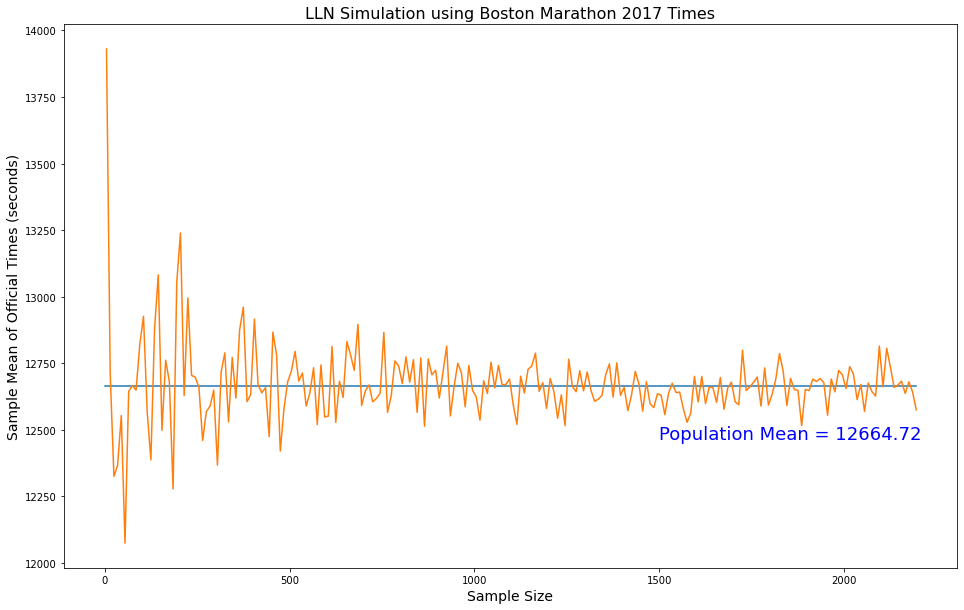

In [60]:
# set graph size
fig, ax = plt.subplots(figsize=(16,10))

# draw a horizontal line at the population mean                                             
ax.plot((0, sample_sizes[-1]), (pop_mean, pop_mean)) 

# make a line plot of sample means vs. sample sizes
ax.plot(sample_sizes, sample_means) 
ax.text(1500, pop_mean - 200, "Population Mean = " + str(round(pop_mean,2)), fontsize=18, c="b")                   
ax.set_title("LLN Simulation using Boston Marathon 2017 Times", size=16)
ax.set_ylabel("Sample Mean of Official Times (seconds)", size=14)
ax.set_xlabel("Sample Size", size=14)

### Step 5:  Separate out Male and Female Data

In [67]:
male_df=boston_df.loc[boston_df['M/F']=='M']    # Locate all male observations and make a new df
male_df.shape

(14438, 6)

In [68]:
male_df.head()                                  # Display first 5 rows

,Age,M/F,State,Country,Official Time,Time in seconds
0,24,M,NaN,KEN,2:09:37,7329
1,30,M,OR,USA,2:09:58,7329
2,25,M,NaN,JPN,2:10:28,7330
3,32,M,CA,USA,2:12:08,7332
4,31,M,NaN,KEN,2:12:35,7332


In [69]:
female_df=boston_df.loc[boston_df['M/F']=='F']    # Locate all female observations and make a new df
female_df.shape

(11972, 6)

In [70]:
female_df.head()                                  # Display first five rows

,Age,M/F,State,Country,Official Time,Time in seconds
20,37,F,NaN,KEN,2:21:52,7341
23,27,F,NaN,BRN,2:22:51,7342
24,25,F,OR,USA,2:23:00,7343
33,33,F,MI,USA,2:25:06,7345
43,33,F,NaN,KEN,2:27:20,7347


### Step 7:  Find population and sample means for male and female data

In [65]:
male_pop_mean=male_df['Time in seconds'].mean()       # Calculate the mean Time in Seconds male vs. female in 2017
female_pop_mean=female_df['Time in seconds'].mean()

print("Male mean time: ", male_pop_mean)              # Display
print("Female mean time: ", female_pop_mean)


Male mean time:  12144.474858013575
Female mean time:  13292.134981623789


In [97]:
sample_sizesmf = range(5, 2000, 10)      # Generate a list of sample sizes

sample_meansm = []
sample_meansm = [male_df["Time in seconds"].sample(s).mean() for s in sample_sizesmf]    # For each of the sample sizes, 
                                                                                         # find the mean of the male times 
sample_meansm[:10]                      #  Display the first 10 means      


[13204.0,
 11751.466666666667,
 12325.84,
 12262.085714285715,
 12395.377777777778,
 12405.309090909092,
 12022.753846153846,
 12326.64,
 12517.35294117647,
 11821.61052631579]

In [98]:

sample_meansf = []
sample_meansf = [female_df["Time in seconds"].sample(s).mean() for s in sample_sizesmf]    # For each of the sample sizes, 
                                                                                           # find the mean of the female times
sample_meansf[:10]                      #  Display the first 10 means      


[14663.0,
 13448.333333333334,
 13646.48,
 12999.171428571428,
 12960.022222222222,
 12874.072727272727,
 13487.153846153846,
 13208.52,
 13338.24705882353,
 13514.22105263158]

### Step 8:  Visualize sample means vis-a-vis population mean for male and female data

Text(0.5, 0, 'Sample Size')

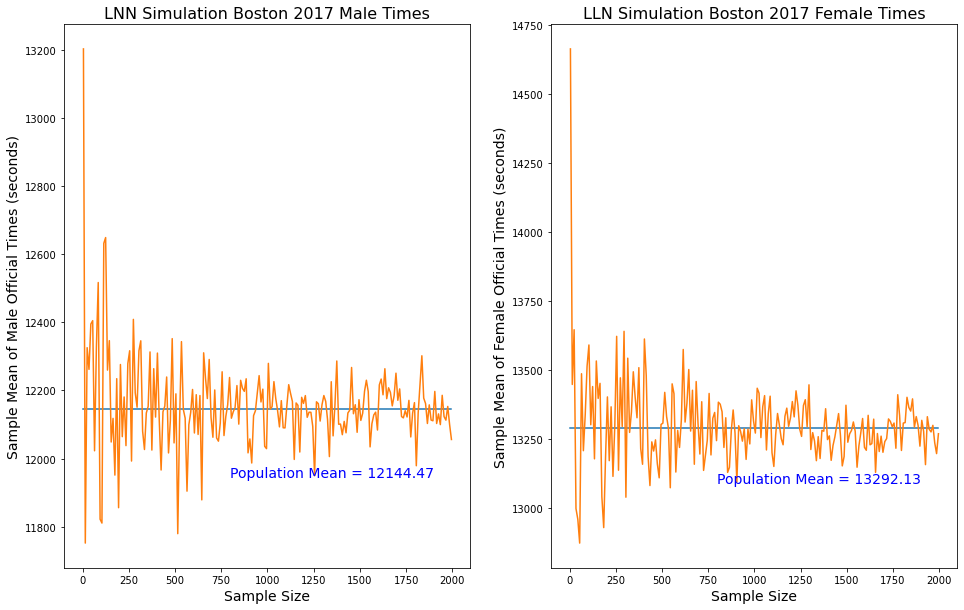

In [99]:
# set graph size
fig, ax = plt.subplots(1,2,figsize=(16,10))

# draw a horizontal line at the population means for male and female times                                            
ax[0].plot((0, sample_sizesmf[-1]), (male_pop_mean, male_pop_mean)) 
ax[1].plot((0, sample_sizesmf[-1]), (female_pop_mean, female_pop_mean)) 

# make a line plot of sample means vs. sample sizes for male and female times
ax[0].plot(sample_sizesmf, sample_meansm) 
ax[0].text(800, male_pop_mean - 200, "Population Mean = " + str(round(male_pop_mean,2)), fontsize=14, c="b")                   
ax[0].set_title("LNN Simulation Boston 2017 Male Times", size=16)
ax[0].set_ylabel("Sample Mean of Male Official Times (seconds)", size=14)
ax[0].set_xlabel("Sample Size", size=14)

ax[1].plot(sample_sizesmf, sample_meansf) 
ax[1].text(800, female_pop_mean - 200, "Population Mean = " + str(round(female_pop_mean,2)), fontsize=14, c="b")                   
ax[1].set_title("LLN Simulation Boston 2017 Female Times", size=16)
ax[1].set_ylabel("Sample Mean of Female Official Times (seconds)", size=14)
ax[1].set_xlabel("Sample Size", size=14)

### Step 9:  Look at the distribution of times for male and female runners

Text(0, 0.5, 'Density')

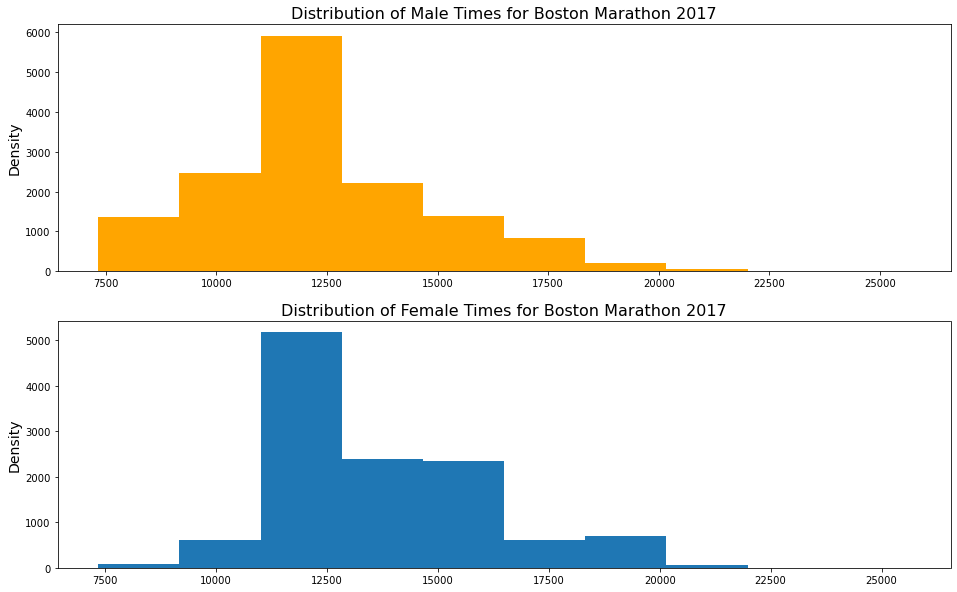

In [168]:
fig, ax = plt.subplots(2,1,figsize=(16,10))

ax[0].hist(male_df["Time in seconds"],color='orange')
ax[0].set_title("Distribution of Male Times for Boston Marathon 2017", size=16)
ax[0].set_ylabel("Density", size=14)

ax[1].hist(female_df["Time in seconds"])
ax[1].set_title("Distribution of Female Times for Boston Marathon 2017", size=16)
ax[1].set_ylabel("Density", size=14)



### Step 10:  Just out of curiosity...

In [101]:
print("The most common age of all runners in the Boston 2017 marathon: ", boston_df['Age'].mode())
print("The most common age of all men in the Boston 2017 marathon: ", male_df['Age'].mode())
print("The most common age of all women in the Boston 2017 marathon: ", female_df['Age'].mode())

The most common age of all runners in the Boston 2017 marathon:  0    45
dtype: int64
The most common age of all men in the Boston 2017 marathon:  0    45
dtype: int64
The most common age of all women in the Boston 2017 marathon:  0    45
dtype: int64


In [110]:
print("The most common State of all runners in the Boston 2017 marathon: ", boston_df['State'].mode())
print("The most common Country of all runners in the Boston 2017 marathon: ", boston_df['Country'].mode())
print("The most common Country of top 10 runners in the Boston 2017 marathon: ", boston_df['Country'][:9].mode())

The most common State of all runners in the Boston 2017 marathon:  0    MA
dtype: object
The most common Country of all runners in the Boston 2017 marathon:  0    USA
dtype: object
The most common Country of top 10 runners in the Boston 2017 marathon:  0    USA
dtype: object
